importe

In [25]:
import pandas as pd
from geopy.geocoders import Nominatim #Geokodierung, Nominatim-> OpenStreetMap(Koordinaten)
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pycountry

Funktion erstellen (für functions-Ordner/ alle)
- aus dem Ufo-Datensatz longitude und latitude ziehen
- städte und länder ziehen
- neue spalte /alte ersetzen

ufo-Datensatz laden

In [26]:
ufo_path = (r"C:\Users\Admin\Documents\Projekt_Ufo\Projekt_UFO\data\data_clean\ufo_sightings_scrubbed_clean.csv") # ufodaten laden
ufo_df = pd.read_csv(ufo_path)

Land aus Long und Lat ziehen und an df anhängen

In [27]:
# UFO-Datensatz in einen GeoDataFrame (gdf) umwandeln
ufo_df['geometry'] = ufo_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1) # neue spalte erstellen, die long und lat kombiniert (gdf)
ufo_gdf = gpd.GeoDataFrame(ufo_df, geometry='geometry', crs="EPSG:4326") # df in gdf umwandeln

# Weltkarte laden
world = gpd.read_file(r"C:\Users\Admin\Documents\Projekt_Ufo\Projekt_UFO\data\shapes_from_natural_earth\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp")
world = world.to_crs("EPSG:4326")  # gdf erstellen und mit Koordinatenreferenzsystem (CRS) verbinden (ist so :D)

# Räumliche Verknüpfung durchführen
joined_gdf = gpd.sjoin(ufo_gdf, world, how="left", predicate="within") # statt .apply von df/pandas

# Ländernamen extrahieren und dem ursprünglichen DataFrame hinzufügen
ufo_df['geo_country'] = joined_gdf['NAME']

# Ergebnis anzeigen
print(ufo_df.head())

              datetime                  city state country     shape  \
0  1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1  1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2  1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3  1956-10-10 21:00:00                  edna    tx      us    circle   
4  1960-10-10 20:00:00               kaneohe    hi      us     light   

   duration_seconds duration_hour_min  \
0              2700        45 minutes   
1              7200           1-2 hrs   
2                20        20 seconds   
3                20          1/2 hour   
4               900        15 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...  2004-04-27  29.883056   
1  1949 Lackland AFB, TX.  Lights racing across t...  2005-12-16  29.384210   
2   Green/Orange circular disc over Chester, England  2008-01-21  53.200000   
3  M

In [28]:
### laura to do -> länderdaten an neues df anpassen -> grafiken neu laden

codes und grafiken zu fragen:
- welche shapes in welchen ländern (wie lange)

In [ ]:
shape_per_country = ufo_df.groupby(['geo_country', 'shape']).size().reset_index(name='count')

sorted_shape_per_country = shape_per_country.sort_values("count", ascending=False).head(10)

print(sorted_shape_per_country)

#sortierung nach häufigkeit
# davon top 10 head(10)

                   geo_country      shape  count
1013  United States of America      light  14360
1021  United States of America   triangle   6978
998   United States of America     circle   6434
1008  United States of America   fireball   5447
1022  United States of America    unknown   4889
1014  United States of America      other   4834
1019  United States of America     sphere   4645
1005  United States of America       disk   4453
1015  United States of America       oval   3236
1011  United States of America  formation   2118


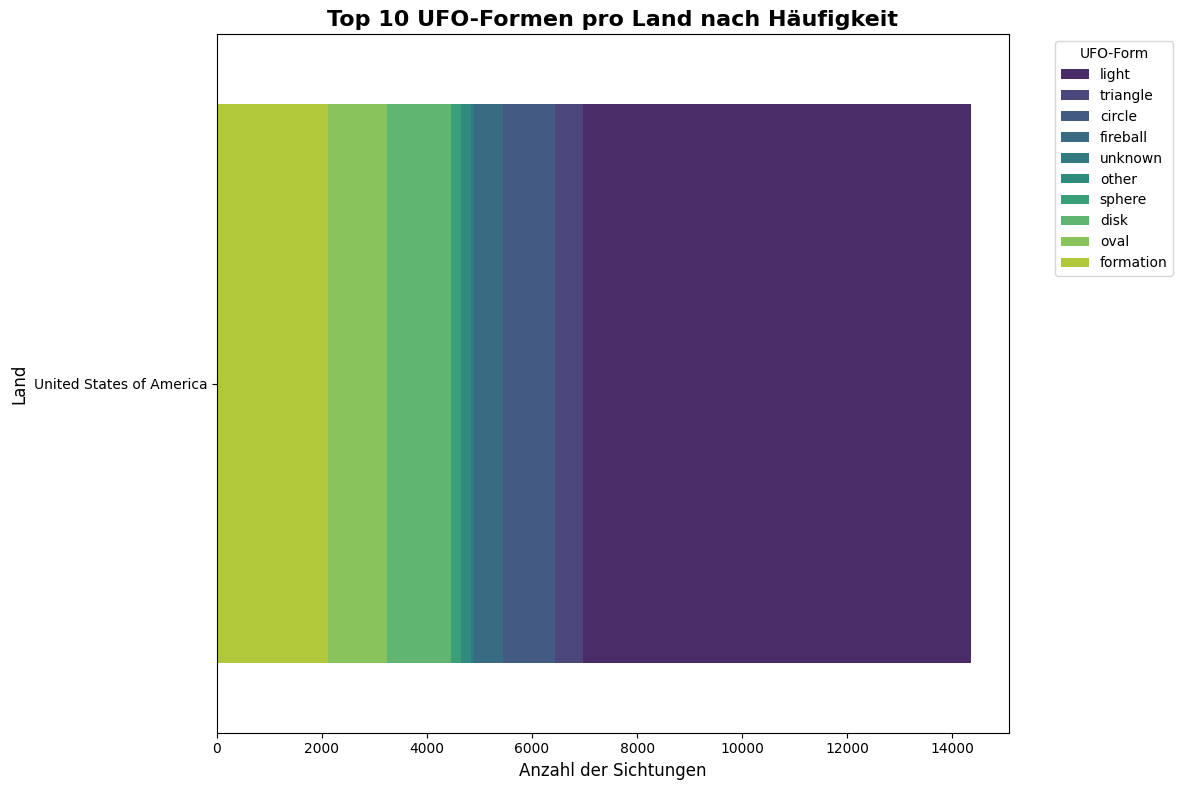

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daten vorbereiten
shape_per_country = ufo_df.groupby(['geo_country', 'shape']).size().reset_index(name='count')
top_10_shapes_per_country = shape_per_country.sort_values("count", ascending=False).head(10)

# Plot erstellen
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_shapes_per_country,
    x="count",  # Anzahl der Sichtungen auf der x-Achse
    y="geo_country",  # Länder auf der y-Achse
    hue="shape",  # UFO-Formen als Farben
    palette="viridis",  # Farbpalette
    dodge=False  # Balken nicht nebeneinander, sondern übereinander
)

# Titel und Beschriftungen hinzufügen
plt.title("Top 10 UFO-Formen pro Land nach Häufigkeit", fontsize=16, fontweight="bold")
plt.xlabel("Anzahl der Sichtungen", fontsize=12)
plt.ylabel("Land", fontsize=12)
plt.legend(title="UFO-Form", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legende außerhalb platzieren

# Plot anzeigen
plt.tight_layout()
plt.show()